In [1]:
%pylab inline
import octopus
from pygadgetreader import *
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## To do:

1. Check which is the best radii to compute the V COM (look at sims)
2. Decide which one is the best criterium to stop the iteration in radius.

In [2]:
halo_pos = readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_40M_20new_b0_6_142', 'pos', 'dm')
halo_vel = readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_40M_20new_b0_6_142', 'vel', 'dm')
halo_pids = readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_40M_20new_b0_6_142', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [3]:
MW_pos, MW_vel, LMC_pos, LMC_vel = octopus.MW_LMC_particles(halo_pos, halo_vel,halo_pids, 37500000)

In [4]:
len(MW_pos)
len(LMC_pos)

4500000

In [5]:
octopus.CM(LMC_pos, LMC_vel)

0.42688


(array([-27.02234015, -41.17820525,  61.11666339]),
 array([ -23.98766092,   17.18696156,  135.07748624]))

In [23]:
def r_velocities(cm_pos, pos, vel):
    R_cm = ((pos[:,0]-cm_pos[0])**2 + (pos[:,1]-cm_pos[1])**2 + (pos[:,2]-cm_pos[2])**2)**0.5
    index = np.where(R_cm < 15)[0]
    velx_cm = sum(vel[index,0])/len(vel[index,0])
    vely_cm = sum(vel[index,1])/len(vel[index,1])
    velz_cm = sum(vel[index,2])/len(vel[index,2])
    return velx_cm, vely_cm, velz_cm

In [24]:
v_cm = r_velocities([-27.02234015, -41.17820525,  61.11666339], LMC_pos, LMC_vel)
print(v_cm)

(-23.414376210669598, 18.359094757631393, 137.29069248947067)


In [6]:
def ss_velocities(cm_pos, pos, vel, delta):
    """
    Core function to compute the V COM as a fuction of the shell radii.
    """
    N_i = len(vel)
    N = N_i

    vxCM = 0
    vyCM = 0
    vzCM = 0
    vxCM_new = np.zeros(1000)
    vyCM_new = np.zeros(1000)
    vzCM_new = np.zeros(1000)
    vxCM_new[1] = sum(vel[:,0])/N_i
    vyCM_new[1] = sum(vel[:,1])/N_i
    vzCM_new[1] = sum(vel[:,2])/N_i
    i = 1
    Rmax = []
    #Rmax.append(100)
    Rmax.append(0.5)
    R = np.sqrt((pos[:,0]-cm_pos[0])**2 + (pos[:,1]-cm_pos[1])**2 + (pos[:,2]-cm_pos[2])**2)
    
    while ((np.sqrt((vxCM_new[i]-vxCM_new[i-1])**2 + (vyCM_new[i]-vyCM_new[i-1])**2 + (vzCM_new[i]-vzCM_new[i-1])**2) > delta)):
                       
        # Reducing Sphere by its 2.5%
        index = np.where(R<Rmax[i-1]*1.3)[0]
        R1 = R[index]
        Rmax.append(np.max(R1))
        #print(len(index))
        vel1 = vel[index]
        #print(len(vel))
        N = len(vel1)
        print(np.max(R1), N)
        i+=1

        #Computing new CM coordinates and velocities
        vxCM_new[i] = np.sum(vel1[:,0])/N
        vyCM_new[i] = np.sum(vel1[:,1])/N
        vzCM_new[i] = np.sum(vel1[:,2])/N

        #print(i)
        #print(Rmax[i])
        
    return  vxCM_new[np.nonzero(vxCM_new)], vyCM_new[np.nonzero(vyCM_new)], vzCM_new[np.nonzero(vzCM_new)], Rmax

In [7]:
vxcm, vycm, vzcm, R = ss_velocities([-27.02234015, -41.17820525,  61.11666339], LMC_pos, LMC_vel, 0.0)

0.64997 2803
0.844934 5253
1.09839 9227
1.42769 15700
1.85595 25759
2.41271 41713
3.13648 65873
4.07742 101502
5.30063 152403
6.89079 222293
8.95803 313306
11.6454 426365
15.139 559001
19.6807 714572
25.5849 907689
33.2604 1150906
43.2384 1449628
56.2098 1804472
73.0727 2210468
94.9944 2650484
123.493 3071539
160.54 3390476
208.702 3623785
271.312 3804338
352.704 3953336
458.514 4074917
596.065 4174376
774.877 4254200
1007.33 4314717
1309.53 4360136
1702.39 4394683
2213.1 4420298
2877.0 4439750
3740.08 4454632
4861.79 4466064
6319.35 4474915
8214.18 4481743
10677.4 4486922
13880.0 4490952
18042.6 4494172
23453.9 4496535
30489.7 4498347
39620.3 4499814
41474.2 4500000
41474.2 4500000


In [17]:
v_cm

(-21.06703111111111, -30.612245333333334, 79.730659555555562)

(0, 100)

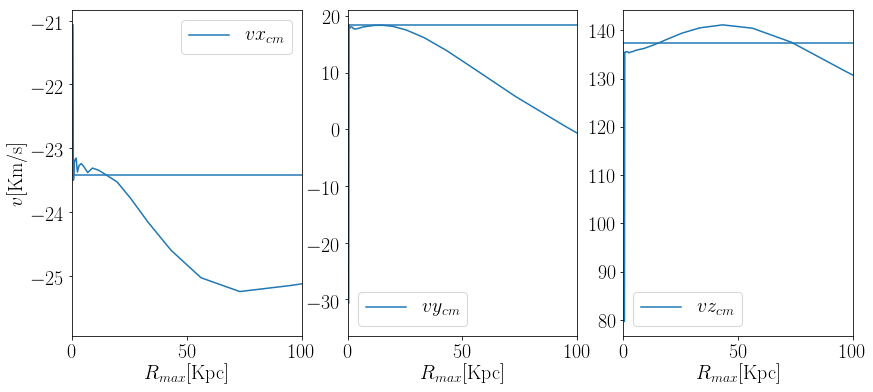

In [26]:
figure(figsize=(14,6))
subplot(1, 3, 1)
plot(R, vxcm, label='$vx_{cm}$')
legend()
ylabel('$v$[Km/s]')
xlabel('$R_{max}$[Kpc]')
xlim(0, 100)
axhline(v_cm[0])

subplot(1, 3, 2)
plot(R, vycm, label='$vy_{cm}$')
legend()
xlabel('$R_{max}$[Kpc]')
xlim(0, 100)
axhline(v_cm[1])


subplot(1, 3, 3)
plot(R, vzcm, label='$vz_{cm}$')
xlabel('$R_{max}$[Kpc]')
legend()
axhline(v_cm[2])


xlabel('$R_{max}$[Kpc]')
xlim(0, 100)